# Title

In [1]:
#!pip install squarify
#!pip install textacy
import nltk
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

I hadn't realised it didn't have headings. E, F, G, H represent the following data:

'like_count', 'quote_count', 'reply_count','retweet_count'

In [2]:
import pandas as pd
df = pd.DataFrame()
for i in range(2016,2021):
    df_read = pd.read_csv(f'data/{i}_ryan_data.csv')
    df = df.append(df_read)

In [3]:
df

id1                       date nothing           id2  \
0      3.439381e+09  2016-01-02 23:58:30+00:00          6.834370e+17   
1      1.299995e+09  2016-01-02 23:40:06+00:00          6.834330e+17   
2      1.295879e+09  2016-01-02 23:40:05+00:00          6.834330e+17   
3      1.299995e+09  2016-01-02 23:20:02+00:00          6.834280e+17   
4      1.295879e+09  2016-01-02 23:20:02+00:00          6.834280e+17   
...             ...                        ...     ...           ...   
87804  1.012610e+18  2020-12-29 20:34:46+00:00          1.344020e+18   
87805  2.882976e+09  2020-12-29 20:33:35+00:00          1.344020e+18   
87806  1.498913e+08  2020-12-29 20:33:34+00:00          1.344020e+18   
87807  1.012610e+18  2020-12-29 20:32:46+00:00          1.344020e+18   
87808  1.141510e+18  2020-12-29 20:31:15+00:00          1.344020e+18   

       like_count  quote_count  reply_count  retweet_count  \
0               0            0            0              1   
1               0            0            0              0   
2               0            0            0              0   
3               0            0            0              0   
4               0            0            0              0   
...           ...          ...          ...            ...   
87804           0            1            0              0   
87805           6            0            0              1   
87806           1            0            0              5   
87807           0            0            0              0   
87808           6            0            0              0   

                                                    text  Unnamed: 9  
0      #OKCash/#BTC current rate:\nBittrex: 0.0000017...       False  
1      Current price: 398.34€ $BTCEUR $btc #bitcoin 2...       False  
2      Current price: 433.54$ $BTCUSD $btc #bitcoin 2...       False  
3      Current price: 398.18€ $BTCEUR $btc #bitcoin 2...       False  
4      Current price: 433.36$ $BTCUSD $btc #bitcoin 2...       False  
...                                                  ...         ...  
87804  $XRP Fut/Spot basis changed significantly.\n-2...       False  
87805  $SOLANA $SOL CT Folks do not under estimate So...       False  
87806  $HTSC, Getting ready to run. Nickel EV play th...       False  
87807  $XRP Fut/Spot basis changed significantly.\n-2...       False  
87808  $BTC - hedge against inflation\n$ETH - basical...       False  

[476170 rows x 10 columns]

### 1.0 Remove all tweets that begin with "Current price:"

In [4]:
df['text']

0        #OKCash/#BTC current rate:\nBittrex: 0.0000017...
1        Current price: 398.34€ $BTCEUR $btc #bitcoin 2...
2        Current price: 433.54$ $BTCUSD $btc #bitcoin 2...
3        Current price: 398.18€ $BTCEUR $btc #bitcoin 2...
4        Current price: 433.36$ $BTCUSD $btc #bitcoin 2...
                               ...                        
87804    $XRP Fut/Spot basis changed significantly.\n-2...
87805    $SOLANA $SOL CT Folks do not under estimate So...
87806    $HTSC, Getting ready to run. Nickel EV play th...
87807    $XRP Fut/Spot basis changed significantly.\n-2...
87808    $BTC - hedge against inflation\n$ETH - basical...
Name: text, Length: 476170, dtype: object

In [5]:
df = df[~df.text.str.contains('Current price:')]
df = df[~df.text.str.contains('Current price')]
df = df[~df.text.str.contains('current price')]
df = df[~df.text.str.contains('current rate:')]
df = df[~df.text.str.contains('Current rate:')]
df = df[~df.text.str.contains(r'[0-9]')]

In [6]:
#keep only tweets that contain $BTC

In [7]:
df = df.reset_index(drop=True)

In [8]:
df

id1                       date nothing           id2  \
0       2.231450e+09  2016-01-02 22:46:02+00:00          6.834190e+17   
1       2.356524e+09  2016-01-02 18:05:59+00:00          6.833490e+17   
2       2.356524e+09  2016-01-02 18:04:12+00:00          6.833480e+17   
3       2.356524e+09  2016-01-02 18:03:26+00:00          6.833480e+17   
4       2.356524e+09  2016-01-02 18:02:11+00:00          6.833480e+17   
...              ...                        ...     ...           ...   
138041  2.263133e+07  2020-12-29 20:37:48+00:00          1.344020e+18   
138042  1.137140e+18  2020-12-29 20:35:48+00:00          1.344020e+18   
138043  9.742810e+17  2020-12-29 20:35:33+00:00          1.344020e+18   
138044  7.634180e+17  2020-12-29 20:35:21+00:00          1.344020e+18   
138045  1.171940e+18  2020-12-29 20:35:12+00:00          1.344020e+18   

        like_count  quote_count  reply_count  retweet_count  \
0                0            0            0              0   
1                0            0            0              0   
2                0            0            0              0   
3                0            0            0              0   
4                0            0            0              0   
...            ...          ...          ...            ...   
138041           1            0            2              0   
138042           2            0            2              0   
138043           6            0            2              0   
138044         735           11          109             66   
138045           6            0            1              0   

                                                     text  Unnamed: 9  
0                                       BUY #bitcoin $BTC       False  
1       $CTXS Information for Citrix Systems, Inc.\nFr...       False  
2       $CLW Information for Clearwater Paper Corporat...       False  
3       $INTC Information for Intel Corp.\nFrom our St...       False  
4       $CLNE Information for Clean Energy Fuels Corp....       False  
...                                                   ...         ...  
138041  I still believe more words of Ripple than most...       False  
138042  Is the SEC saying that all of the $XRP Ripple ...       False  
138043  Doing our part to keep $AMC alive. Rented out ...       False  
138044  It is now too risky to hold any investment tha...       False  
138045  Not sure whats more exciting tbh. $XRP getting...       False  

[138046 rows x 10 columns]

### 1.1 Clean tweets

Now we clean the tweets so they don't impact the analysis. The following steps were taken so tweets and the words are cleaned. If there are any characters next to valid words that may impact how we count up the frequency of words. For example, we eliminate brackets from this text "(good)" to make "good" and therefore the original text can be bundled with the other words "good" in corpus.

Here are the steps we will take to clean up the text, again using regular expressions:

1. Convert html expressions such as \n and &amp; to characters
2. Delete any html tags such as <'tab'>
3. We will keep URLS as they may help for the classification in Task D. Sometimes it's good to remove URLS from a text however in this case perhaps certain tweets with misinformation often link to a website so it could be possible that a URL helps to predict a tweet with misinformation.
4. Eliminate any brackets
5. Clean up hashes that don't form a hashtag. So we remove a text like this: &#- but we keep text like this "#hello".
6. Clean up hyphens
7. Clean up white spaces to just one white space

We create a program that creates the above steps and after we apply that to the data.

Here is a program that will clean up the text:

In [9]:
import html

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    #no hashtags
    #text = re.sub('\#[\w\_]+',' ', text)
    #no dollar
    #text = re.sub('\$[\w\_]+',' ', text)
    return text.strip()

Apply the cleaning program we just created to all the tweets and call these cleaned tweets "clean_text" in our dataframe.

In [10]:
df['text1'] = df['text'].map(clean)

In [11]:
for i in range(10):
    print("---------------","\n","Tweet number", i, "\n","--------------")
    print(df['text'][i],"---->",df['text1'][i])

--------------- 
 Tweet number 0 
 --------------
BUY #bitcoin $BTC ----> BUY #bitcoin $BTC
--------------- 
 Tweet number 1 
 --------------
$CTXS Information for Citrix Systems, Inc.
From our Stock News Alerts App ----> $CTXS Information for Citrix Systems, Inc. From our Stock News Alerts App
--------------- 
 Tweet number 2 
 --------------
$CLW Information for Clearwater Paper Corporation
From our Stock News Alerts App ----> $CLW Information for Clearwater Paper Corporation From our Stock News Alerts App
--------------- 
 Tweet number 3 
 --------------
$INTC Information for Intel Corp.
From our Stock News Alerts App ----> $INTC Information for Intel Corp. From our Stock News Alerts App
--------------- 
 Tweet number 4 
 --------------
$CLNE Information for Clean Energy Fuels Corp.
From our Stock News Alerts App ----> $CLNE Information for Clean Energy Fuels Corp. From our Stock News Alerts App
--------------- 
 Tweet number 5 
 --------------
SELL #bitcoin $BTC ----> SELL #bitcoin

### 1.2 Convert all tweets to lowercase for tokenisation
We convert to lowercase so words like "corona" and "Corona" which means in the analysis both words come under the label "corona". This is important because we don't want these to be treated as two different words just because one is capitalised - that would make the statistical analysis weaker.

In [12]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s) #convert all to lowercase


In [13]:
df['text1'][2]

'$clw information for clearwater paper corporation from our stock news alerts app'

In [14]:
#keep only tweets that contain btc

In [15]:
df

id1                       date nothing           id2  \
0       2.231450e+09  2016-01-02 22:46:02+00:00          6.834190e+17   
1       2.356524e+09  2016-01-02 18:05:59+00:00          6.833490e+17   
2       2.356524e+09  2016-01-02 18:04:12+00:00          6.833480e+17   
3       2.356524e+09  2016-01-02 18:03:26+00:00          6.833480e+17   
4       2.356524e+09  2016-01-02 18:02:11+00:00          6.833480e+17   
...              ...                        ...     ...           ...   
138041  2.263133e+07  2020-12-29 20:37:48+00:00          1.344020e+18   
138042  1.137140e+18  2020-12-29 20:35:48+00:00          1.344020e+18   
138043  9.742810e+17  2020-12-29 20:35:33+00:00          1.344020e+18   
138044  7.634180e+17  2020-12-29 20:35:21+00:00          1.344020e+18   
138045  1.171940e+18  2020-12-29 20:35:12+00:00          1.344020e+18   

        like_count  quote_count  reply_count  retweet_count  \
0                0            0            0              0   
1                0            0            0              0   
2                0            0            0              0   
3                0            0            0              0   
4                0            0            0              0   
...            ...          ...          ...            ...   
138041           1            0            2              0   
138042           2            0            2              0   
138043           6            0            2              0   
138044         735           11          109             66   
138045           6            0            1              0   

                                                     text  Unnamed: 9  \
0                                       buy #bitcoin $btc       False   
1       $ctxs information for citrix systems, inc.\nfr...       False   
2       $clw information for clearwater paper corporat...       False   
3       $intc information for intel corp.\nfrom our st...       False   
4       $clne information for clean energy fuels corp....       False   
...                                                   ...         ...   
138041  i still believe more words of ripple than most...       False   
138042  is the sec saying that all of the $xrp ripple ...       False   
138043  doing our part to keep $amc alive. rented out ...       False   
138044  it is now too risky to hold any investment tha...       False   
138045  not sure whats more exciting tbh. $xrp getting...       False   

                                                    text1  
0                                       buy #bitcoin $btc  
1       $ctxs information for citrix systems, inc. fro...  
2       $clw information for clearwater paper corporat...  
3       $intc information for intel corp. from our sto...  
4       $clne information for clean energy fuels corp....  
...                                                   ...  
138041  i still believe more words of ripple than most...  
138042  is the sec saying that all of the $xrp ripple ...  
138043  doing our part to keep $amc alive. rented out ...  
138044  it is now too risky to hold any investment tha...  
138045  not sure whats more exciting tbh. $xrp getting...  

[138046 rows x 11 columns]

In [16]:
df_btc = df[df.text1.str.contains('btc')]
df_btc = df_btc.reset_index(drop=True)

In [17]:
df_btc

id1                       date nothing           id2  \
0      2.231450e+09  2016-01-02 22:46:02+00:00          6.834190e+17   
1      2.231450e+09  2016-01-02 15:46:03+00:00          6.833130e+17   
2      4.525069e+09  2016-01-02 13:41:31+00:00          6.832820e+17   
3      2.884971e+09  2016-01-02 00:45:16+00:00          6.830870e+17   
4      2.231450e+09  2016-01-01 17:45:31+00:00          6.829810e+17   
...             ...                        ...     ...           ...   
85486  1.247720e+18  2020-12-29 20:44:46+00:00          1.344020e+18   
85487  1.260750e+18  2020-12-29 20:43:50+00:00          1.344020e+18   
85488  1.965963e+09  2020-12-29 20:43:30+00:00          1.344020e+18   
85489  1.131582e+09  2020-12-29 20:38:23+00:00          1.344020e+18   
85490  7.634180e+17  2020-12-29 20:35:21+00:00          1.344020e+18   

       like_count  quote_count  reply_count  retweet_count  \
0               0            0            0              0   
1               0            0            0              0   
2               0            0            0              0   
3               2            0            0              0   
4               0            0            0              0   
...           ...          ...          ...            ...   
85486           1            0            0              0   
85487          18            0            1              3   
85488          19            0           10              1   
85489           0            0            0              0   
85490         735           11          109             66   

                                                    text  Unnamed: 9  \
0                                      buy #bitcoin $btc       False   
1                                     sell #bitcoin $btc       False   
2      are we going hard or hard going ? ;) $drz $btc...       False   
3      $btc closes the day above the daily range \nni...       False   
4                                     sell #bitcoin $btc       False   
...                                                  ...         ...   
85486  $btc is yet to experience a correction in its ...       False   
85487  i hate $btc and $tsla because dumb people make...       False   
85488  so far these are some bullish looking coins im...       False   
85489  sell at this point if you was late last move o...       False   
85490  it is now too risky to hold any investment tha...       False   

                                                   text1  
0                                      buy #bitcoin $btc  
1                                     sell #bitcoin $btc  
2      are we going hard or hard going ? ;) $drz $btc...  
3      $btc closes the day above the daily range nice...  
4                                     sell #bitcoin $btc  
...                                                  ...  
85486  $btc is yet to experience a correction in its ...  
85487  i hate $btc and $tsla because dumb people make...  
85488  so far these are some bullish looking coins im...  
85489  sell at this point if you was late last move o...  
85490  it is now too risky to hold any investment tha...  

[85491 rows x 11 columns]

### 1.3 Normalisation

Normalisation is doing further cleaning of the text which means we can explore the data better and build a more rigorous statistical model. We use the package textacy to do this as the normalisation steps are nicely available as commands.

The normalisation steps are the following: 
1. Eliminate hyphens in hyphenated words
2. Delete quotation marks
3. Delete unicode
4. Remove accents (such as accented vowels)

First we create a program that does all these steps, and then we apply this program to the corpus of tweets

In [18]:
from  textacy import preprocessing as tprep
def normalise(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

In [19]:
df_btc['text3'] = df_btc['text1'].map(normalise)

### 1.4 Tokenisation

We load in the spacy package which used for text analysis. Spacy is fast when it comes to NLP, simple, popular with a lot of support and for pre-processing its commands are simple.

First we tokenise the tweets, which means splitting the tweets up into individual words.

In [20]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

In [21]:
# df['text4'] = df['text3'].map(nlp)

After we apply this tokenisation, we can now see that each tweet below, given by a row, is split into words. Each word is followed by a comma.

In [22]:
# df['text4']

### 1.5 Delete stop words
These words don't help predict or tell us the opinion of a tweet, so we don't need them and they just add noise to the data if we keep them. Here's a program that deletes stop words.

For example, we eliminate words such as "that" or "the". It tells us nothing about the content of the tweet, it's just noise, so we eliminate them.

First we create a program that gives instructions on how to remove stop words, then we apply it to the tweets

In [23]:
# def stop_words(doc):
#     non_stop = [t for t in doc if not t.is_stop and not t.is_punct]
#      return non_stop

Use the program on our tweets:

In [24]:
# df['text5'] = df['text4'].map(stop_words)

### 1.6 Lemmatisation
This process makes words such as "closed", "closing", "closes" all the same, "closes". Tense doesn't tell us anything about the tweet so we make these words the same as they have the same meaning.

This is useful in the analysis because we want to group all types of the word "show", be it "show, shows, showing, showed" into one lemma: "show" because they essentially all have the same meaning.


See how in the following tweet, the 2nd word is "show". The original tweet has "shows" but with lemmatisation this changes to "show".


We will use the tweets of this section in section 4. We will use tweets from section 1.6 for section 2.

In [25]:
# test = [t.lemma_ for t in df['text5'][1]]
# test

Create a program that does the lemmatisation to our tweets then apply it to the data

In [26]:
# def lemma(doc):
#     doclems = [t.lemma_ for t in doc]
#     return doclems
   

In [27]:
#df['text6'] = df['text5'].map(lemma)

In [28]:
#df['text6']

In [29]:
#sample down for speed

df_btcsamp = df_btc.sample(frac=0.1, replace=True, random_state=1)
df_btcsamp = df_btcsamp.reset_index(drop=True)

In [30]:
replace_list = ['$btc', 'btc' 'bitcoin', '#bitcoin', '#btc', '$bitcoin' , 'crypto', 'cryptocurrency', '$crypto', '#crypto', '#cryptocurrency']
def delete_specwords(text):
    # convert html escapes like &amp; to characters.
    text = re.sub(r'|'.join(map(re.escape, replace_list)), '', text)
    #text = re.sub('\$[\w\_]+',' ', text)
    return text.strip()

df_btc['text4'] = df_btc['text3'].map(delete_specwords)

In [31]:
df_btc

id1                       date nothing           id2  \
0      2.231450e+09  2016-01-02 22:46:02+00:00          6.834190e+17   
1      2.231450e+09  2016-01-02 15:46:03+00:00          6.833130e+17   
2      4.525069e+09  2016-01-02 13:41:31+00:00          6.832820e+17   
3      2.884971e+09  2016-01-02 00:45:16+00:00          6.830870e+17   
4      2.231450e+09  2016-01-01 17:45:31+00:00          6.829810e+17   
...             ...                        ...     ...           ...   
85486  1.247720e+18  2020-12-29 20:44:46+00:00          1.344020e+18   
85487  1.260750e+18  2020-12-29 20:43:50+00:00          1.344020e+18   
85488  1.965963e+09  2020-12-29 20:43:30+00:00          1.344020e+18   
85489  1.131582e+09  2020-12-29 20:38:23+00:00          1.344020e+18   
85490  7.634180e+17  2020-12-29 20:35:21+00:00          1.344020e+18   

       like_count  quote_count  reply_count  retweet_count  \
0               0            0            0              0   
1               0            0            0              0   
2               0            0            0              0   
3               2            0            0              0   
4               0            0            0              0   
...           ...          ...          ...            ...   
85486           1            0            0              0   
85487          18            0            1              3   
85488          19            0           10              1   
85489           0            0            0              0   
85490         735           11          109             66   

                                                    text  Unnamed: 9  \
0                                      buy #bitcoin $btc       False   
1                                     sell #bitcoin $btc       False   
2      are we going hard or hard going ? ;) $drz $btc...       False   
3      $btc closes the day above the daily range \nni...       False   
4                                     sell #bitcoin $btc       False   
...                                                  ...         ...   
85486  $btc is yet to experience a correction in its ...       False   
85487  i hate $btc and $tsla because dumb people make...       False   
85488  so far these are some bullish looking coins im...       False   
85489  sell at this point if you was late last move o...       False   
85490  it is now too risky to hold any investment tha...       False   

                                                   text1  \
0                                      buy #bitcoin $btc   
1                                     sell #bitcoin $btc   
2      are we going hard or hard going ? ;) $drz $btc...   
3      $btc closes the day above the daily range nice...   
4                                     sell #bitcoin $btc   
...                                                  ...   
85486  $btc is yet to experience a correction in its ...   
85487  i hate $btc and $tsla because dumb people make...   
85488  so far these are some bullish looking coins im...   
85489  sell at this point if you was late last move o...   
85490  it is now too risky to hold any investment tha...   

                                                   text3  \
0                                      buy #bitcoin $btc   
1                                     sell #bitcoin $btc   
2      are we going hard or hard going ? ;) $drz $btc...   
3      $btc closes the day above the daily range nice...   
4                                     sell #bitcoin $btc   
...                                                  ...   
85486  $btc is yet to experience a correction in its ...   
85487  i hate $btc and $tsla because dumb people make...   
85488  so far these are some bullish looking coins im...   
85489  sell at this point if you was late last move o...   
85490  it is now too risky to hold any investment tha...   

                                                   text4  
0                                       

In [32]:
#sample down for speed
df_btcsamp = df_btc.sample(frac=0.1, replace=True, random_state=1)
df_btcsamp = df_btcsamp.reset_index(drop=True)

In [33]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


#animals.remove('rabbit')


#stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub("\$", "", sent)
        sent = re.sub("\#", "", sent)
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  


# Convert to list
data = df_btcsamp.text4.values.tolist()
data_words = list(sent_to_words(data))
#print(data_words[:3])


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=5)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
### nouns only in this case
# !python3 -m spacy download en  # run in terminal once

#here is the override, can delete the words or add any or can leave as an empty list. 
#allowed_words = ['app']
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(token, allow_update=True) for token in data_ready]



In [34]:
gensim_dictionary  = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
gensim_corpus  = [gensim_dictionary.doc2bow(token, allow_update=True) for token in data_ready]

In [35]:
import pickle

pickle.dump(gensim_corpus, open('gensim_corpus_corpus.pkl', 'wb'))
gensim_dictionary.save('gensim_dictionary.gensim')

In [36]:
import gensim

lda_model = gensim.models.ldamodel.LdaModel(gensim_corpus, num_topics=8, id2word=gensim_dictionary, passes=20)
lda_model.save('gensim_model.gensim')

In [37]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.021*"bcc" + 0.011*"bounce" + 0.009*"new" + 0.009*"bear" + 0.008*"drop" + 0.008*"show" + 0.008*"nice" + 0.008*"first" + 0.007*"alt" + 0.007*"eth"')
(1, '0.013*"time" + 0.013*"high" + 0.011*"price" + 0.010*"go" + 0.009*"today" + 0.009*"low" + 0.009*"long" + 0.009*"thank" + 0.008*"trading" + 0.008*"fast"')
(2, '0.027*"xrp" + 0.026*"eth" + 0.022*"neo" + 0.020*"sell" + 0.017*"ltc" + 0.013*"currency" + 0.013*"trx" + 0.012*"link" + 0.010*"coin" + 0.010*"ada"')
(3, '0.036*"go" + 0.016*"get" + 0.014*"alt" + 0.013*"right" + 0.012*"make" + 0.012*"feel" + 0.010*"look" + 0.010*"chart" + 0.009*"want" + 0.009*"bullish"')
(4, '0.033*"buy" + 0.018*"alt" + 0.017*"dump" + 0.017*"go" + 0.016*"pump" + 0.015*"short" + 0.014*"get" + 0.013*"long" + 0.011*"market" + 0.011*"dip"')
(5, '0.018*"eth_ltc" + 0.016*"strat" + 0.013*"xrp" + 0.012*"ltc" + 0.012*"sc" + 0.012*"lbc" + 0.010*"xmr" + 0.009*"never" + 0.009*"bat" + 0.009*"doge"')
(6, '0.022*"eth" + 0.018*"go" + 0.015*"alt" + 0.014*"move" + 0.013*"btc" +

In [38]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus,
                                           id2word=gensim_dictionary,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


#pprint(lda_model.print_topics())

NameError: name 'pprint' is not defined

In [ ]:
# lda_model = gensim.models.ldamodel.LdaModel(gensim_corpus, num_topics=8, id2word=gensim_dictionary, passes=15)
# lda_model.save('gensim_model.gensim')
# topics = lda_model.print_topics(num_words=5)
# for topic in topics:
#     print(topic)

In [ ]:
# lda_model = gensim.models.ldamodel.LdaModel(gensim_corpus, num_topics=4, id2word=gensim_dictionary, passes=20)
# lda_model.save('gensim_model.gensim')
# topics = lda_model.print_topics(num_words=10)
# for topic in topics:
#     print(topic)

In [ ]:
#print('\nPerplexity:', lda_model.log_perplexity(gensim_corpus))

from gensim.models import CoherenceModel

coherence_score_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=gensim_dictionary, coherence='c_v')
coherence_score = coherence_score_lda.get_coherence()

print('\nCoherence Score:', coherence_score)

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

### 2.4 Table that shows the words that contribute the most to each topic, with the review that contributes the most to that topic

The following table shows for each topic ("Topic_Num") the most important words for that topic ("Keywords") and a sample review that contributes the most to that topic (Review = "Representative Text", review contribution = "Topic_Perc_Contribution")

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

## 3. Visualtion

### 3.1 Wordclouds

This chunk produces word clouds for each topic, showing more important words for each topic with a bigger size. These images are saved to your directory.

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

for t in range(lda_model.num_topics):
    plt.figure(figsize=(20,10))
    plt.imshow(WordCloud(background_color="white", max_words=100, width=960,height=540).fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()
    plt.savefig(f'topic_{t}.png')



### 3.2 t-SNE plot

This shows the topics in 2 dimensions so we can see the similarity between topics. Over your mouse over each point to see some example reviews for that point. 

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[gensim_corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
#arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 7
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)



df_btcsamp['topic'] = topic_num
df_btcsamp['topic']

from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()
top_labels = {0: 'Topic 0', 1:'Topic 1', 2:'Topic 2', 3:'Topic 3', 4: 'Topic 4', 5: 'Topic 5', 6: 'Topic 6', 7:'Topic 7'}
cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'pink'}

df_btcsamp['colors'] = df_btcsamp['topic'].apply(lambda l: cluster_colors[l])
source = ColumnDataSource(dict(
    x=tsne_lda[:,0],
    y=tsne_lda[:,1],
    color=df_btcsamp['colors'],
    label=df_btcsamp['topic'].apply(lambda l: top_labels[l]),
#     msize= p_df['marker_size'],
    topic_key= topic_num,
    #title= p_df[u'Title'],
    content = df_btcsamp['text']
))


title = 'T-SNE visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=600, title=title, tools="pan,wheel_zoom,box_zoom,reset,hover", x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y', legend='label', source=source,
                 color='color', alpha=0.8, size=10)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - Topic: @topic_key "}
plot_lda.legend.location = "top_left"

show(plot_lda)

#save the plot
# save(plot_lda, '{}.html'.format(title))


# import seaborn as sb
# output_notebook()
# #plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# plt.figure(figsize=(16, 9))
# sb.scatterplot(
#     tsne_lda[:,0], y=tsne_lda[:,1], hue=topic_num, 
#     legend="full", palette="rainbow"
# )

In [ ]:
gensim_dictionary = gensim.corpora.Dictionary.load('gensim_dictionary.gensim')
gensim_corpus = pickle.load(open('gensim_corpus_corpus.pkl', 'rb'))
lda_model = gensim.models.ldamodel.LdaModel.load('gensim_model.gensim')


import  pyLDAvis.gensim_models
#pyLDAvis.enable_notebook()


lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, gensim_corpus, gensim_dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)

## 2. LDA Analysis

### 2.1 Run the model and look at the words that contribute most to each topic

The below output shows for each topic the words that contribute the most to that topic, for example "0" shows "not" contributing most to topic 0, "break" contributing most to topic 1, and so on. This will be presented clearer later on in the report.

In [ ]:

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())



In [ ]:
# gensim_dictionary = gensim.corpora.Dictionary.load('gensim_dictionary.gensim')
# gensim_corpus = pickle.load(open('gensim_corpus_corpus.pkl', 'rb'))
# lda_model = gensim.models.ldamodel.LdaModel.load('gensim_model.gensim')


import  pyLDAvis.gensim_models
#pyLDAvis.enable_notebook()


lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_visualization)

### 2.2b Check what is the best number of topics

The following code gets the coherence score of each lda model run using topics in the range 3 to 7 to find which is the most optimal amount of topics. A high coherence score means a good number of topics. 

It's shown that 7 topics gives the highest coherence.

<AxesSubplot:xlabel='n'>

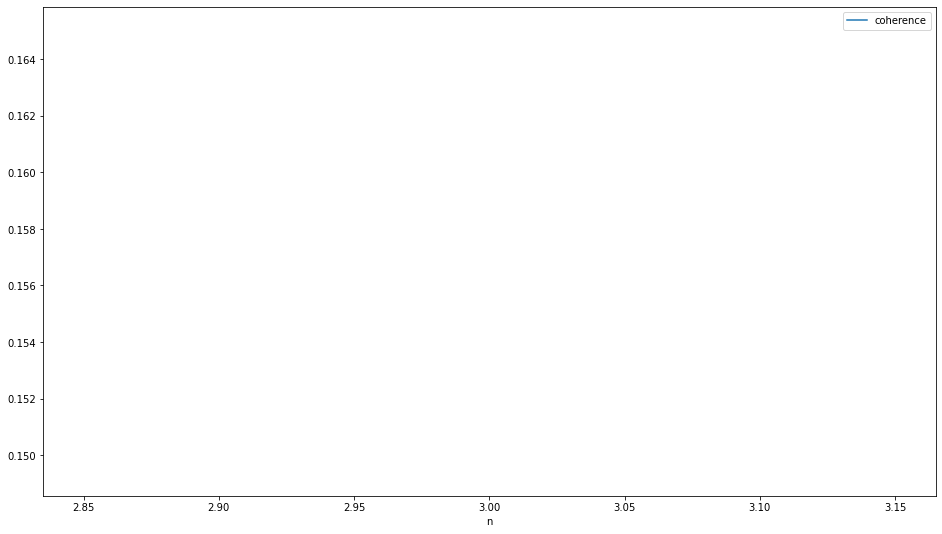

In [40]:

from gensim.models.ldamulticore import LdaMulticore
lda_para_model_n = []
for n in range(3, 4):
    lda_model_c = LdaMulticore(corpus=corpus, id2word=id2word, chunksize=2000, eta='auto', iterations=400, num_topics=n, passes=20, eval_every=None,random_state=42)
    lda_coherence = CoherenceModel(model=lda_model_c, texts=data_ready,dictionary=id2word, coherence='c_v')
    lda_para_model_n.append((n, lda_model_c, lda_coherence.get_coherence()))
pd.DataFrame(lda_para_model_n, columns=["n", "model","coherence"]).set_index("n")[["coherence"]].plot(figsize=(16,9))


In [41]:
id2word

### 2.2a Coherence score check
The following code chunk gives us the coherence score for 7 topics. We get a score of 0.39, which tells us if 7 topics is a good number of topics. This is a relatively low score. This can be explained by the fact there are many reviews with low amount of words, sometimes single words such as "top". With more words in each review, this score would increase. Given this fact, a coherence of 0.54 is acceptable. 

In [235]:
from gensim.models.coherencemodel import CoherenceModel

lda_gensim_para_coherence = CoherenceModel(model=lda_model,
    texts=data_ready, dictionary=id2word, coherence='c_v')
lda_gensim_para_coherence_score = lda_gensim_para_coherence.get_coherence()
print(lda_gensim_para_coherence_score)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.2580323045852048


### 2.3 Create a table so we can see which topic is assigned to each document

The following table shows the assigned topic to every single document. Only the first 10 rows are shown for brevity. To see the whole table delete "head(10)" from the very bottom of the follow code chunk.

In [236]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.7143   
1            1             0.0              0.7293   
2            2             0.0              0.3914   
3            3             5.0              0.6019   
4            4             0.0              0.7143   
5            5             5.0              0.5154   
6            6             4.0              0.7142   
7            7             2.0              0.5239   
8            8             1.0              0.6408   
9            9             2.0              0.7546   

                                                          Keywords  \
0    buy, get, pump, long, short, people, right, think, good, well   
1       money, take, start, link, come, feel, work, way, want, bcc   
2       money, take, start, link, come, feel, work, way, want, bcc   
3   time, bitcoin, ltc, make, trade, day, future, still, dgb, also   
4       money, take, start, link, come, feel, work, way, want, bcc   
5   time, bitcoin, ltc, make, trade, day, future, still, dgb, also   
6  see, currency, much, price, chart, dip, need, bull, watch, news   
7    buy, get, pump, long, short, people, right, think, good, well   
8  go, altcoin, btc, new, trading, usd, twitter, today, try, world   
9    buy, get, pump, long, short, people, right, think, good, well   

                                                                                 Text  
0                                                                  [get, interesting]  
1                    [start, feel, sdr, feature, blockchain, let, guess, basket, nxt]  
2                                                              [pray, mohamme, trump]  
3                 [future, algorhithmic, beat, day, kind, dance, always, good, trade]  
4                                                                         [next, bcc]  
5  [tanking, still, usdt, stress, come_back, due, time, ltc, still, good, safe, also]  
6                                                                       [update, guy]  
7                                                   [seem, gain, momentum, care, bag]  
8                                                      [load, cheap, quan, today, go]  
9                [pump, get, good, buy, anywhere, sle, fiat, eth_ltc, bcrash, btrash]

### 2.4 Table that shows the words that contribute the most to each topic, with the review that contributes the most to that topic

The following table shows for each topic ("Topic_Num") the most important words for that topic ("Keywords") and a sample review that contributes the most to that topic (Review = "Representative Text", review contribution = "Topic_Perc_Contribution")

In [237]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9660   
1        1.0              0.8806   
2        2.0              0.9150   
3        3.0              0.8877   
4        4.0              0.8775   
5        5.0              0.8899   
6        6.0              0.8602   

                                                          Keywords  \
0       money, take, start, link, come, feel, work, way, want, bcc   
1  go, altcoin, btc, new, trading, usd, twitter, today, try, world   
2    buy, get, pump, long, short, people, right, think, good, well   
3     alt, xrp, market, dump, look, back, keep, high, big, eth_xrp   
4  see, currency, much, price, chart, dip, need, bull, watch, news   
5   time, bitcoin, ltc, make, trade, day, future, still, dgb, also   
6          eth, sell, coin, neo, move, bch, hold, last, soon, qtum   

                                                                                   Representative Text  
0  [eulogy, rip, winnie, rip, baloo, rip, yogi, rip, berenstain, rip, gryll, rip, smokey, rip, fozz...  
1  [nflx, tomorrow, mrna, spy, qqq, tsla, nflx, amzn, googl, uup, cgc, vix, xle, jpm, gs, eth, gld,...  
2                                 [logic, oversell, buy, buy, buy, overbought, buy, buy, buy, useless]  
3  [great, loading, zone, bitc, btsc, bitcf, gahc, sing, frfs, omvs, onci, cwir, ifxy, nsav, byoc, ...  
4                                                     [bounce, bounce, bounce, bounce, bounce, bounce]  
5                     [electricity, issue, data, center, hashgoal, issue, resolve, sls, xpy, ltc, aur]  
6                                                                      [eth, coss, odn, snt, dnt, dcr]

## 3. Visualtion

### 3.1 Wordclouds

This chunk produces word clouds for each topic, showing more important words for each topic with a bigger size. These images are saved to your directory.

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


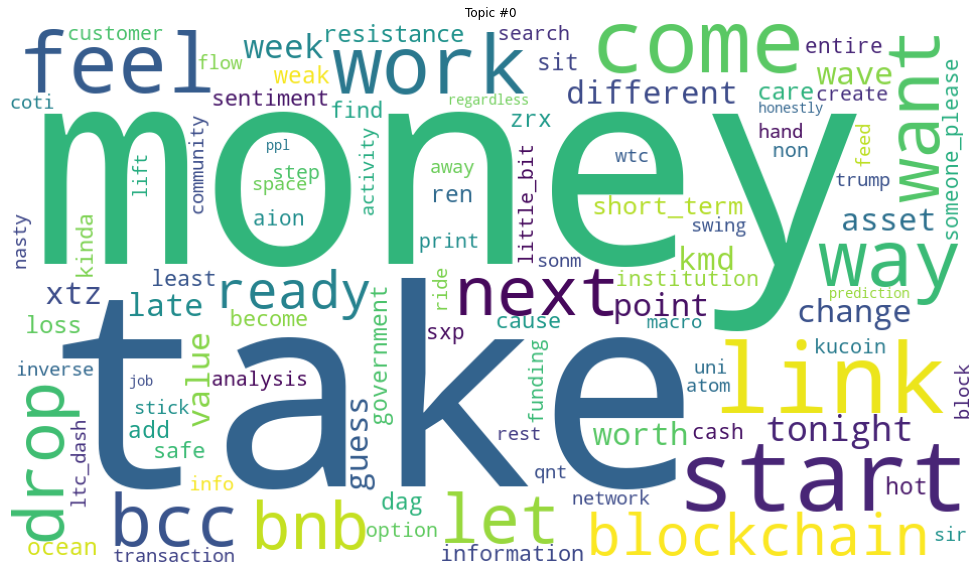

<Figure size 432x288 with 0 Axes>

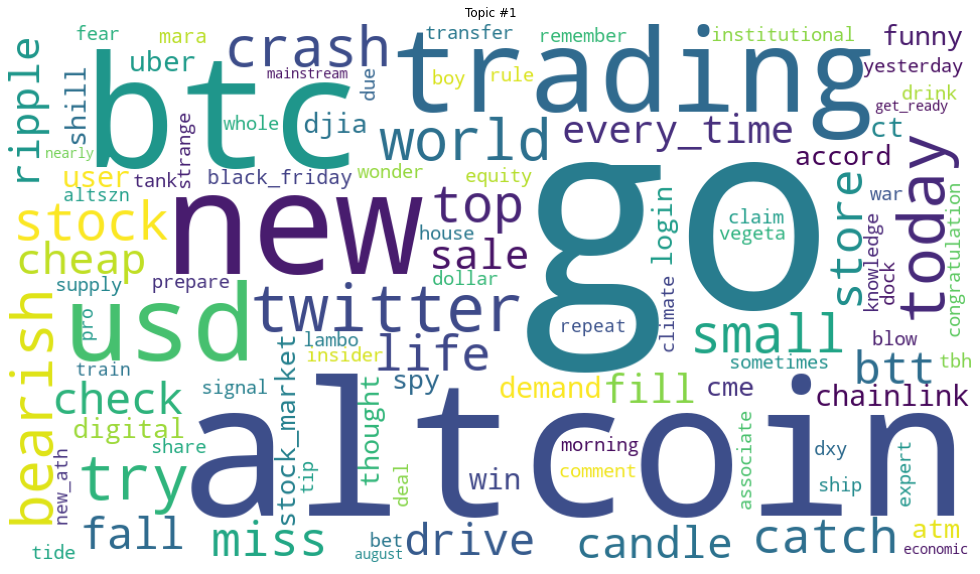

<Figure size 432x288 with 0 Axes>

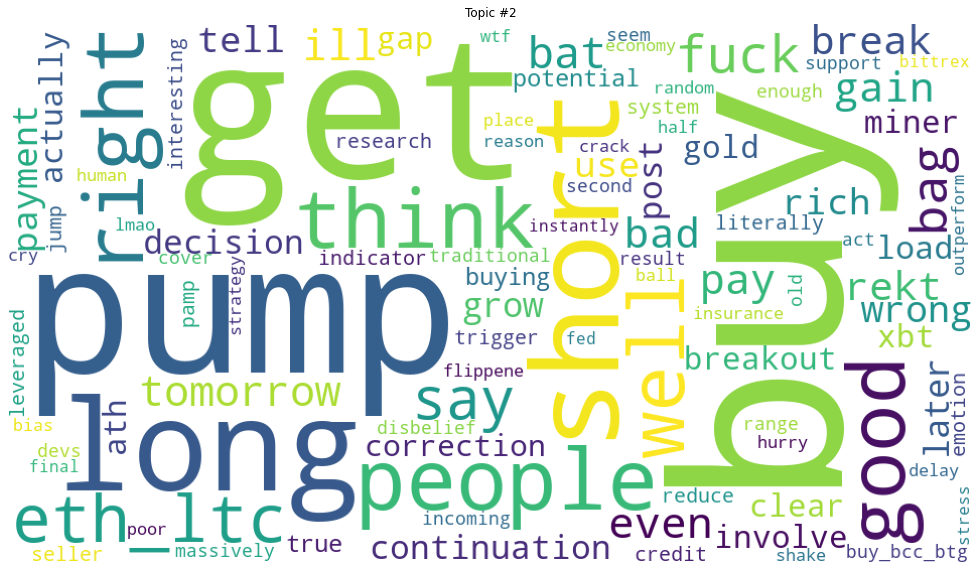

<Figure size 432x288 with 0 Axes>

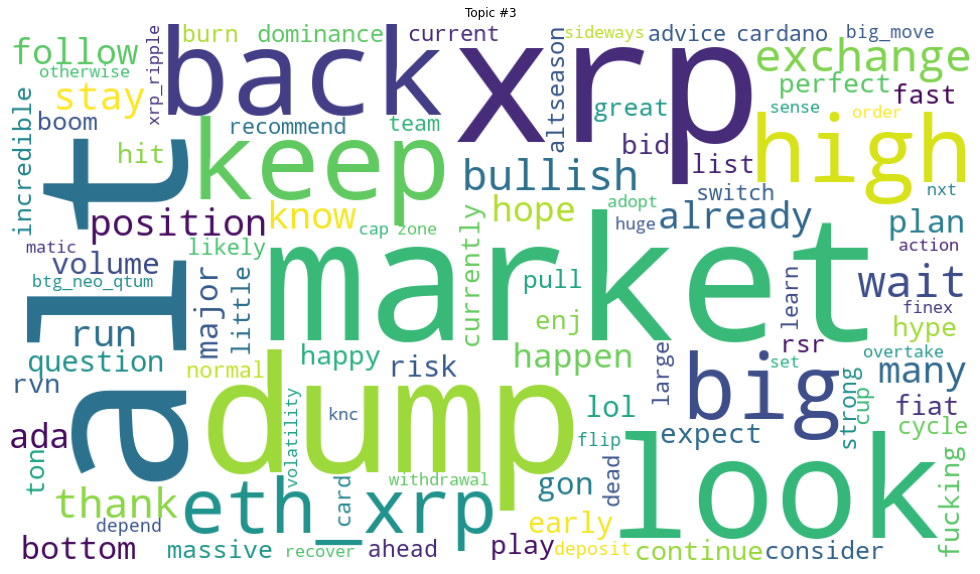

<Figure size 432x288 with 0 Axes>

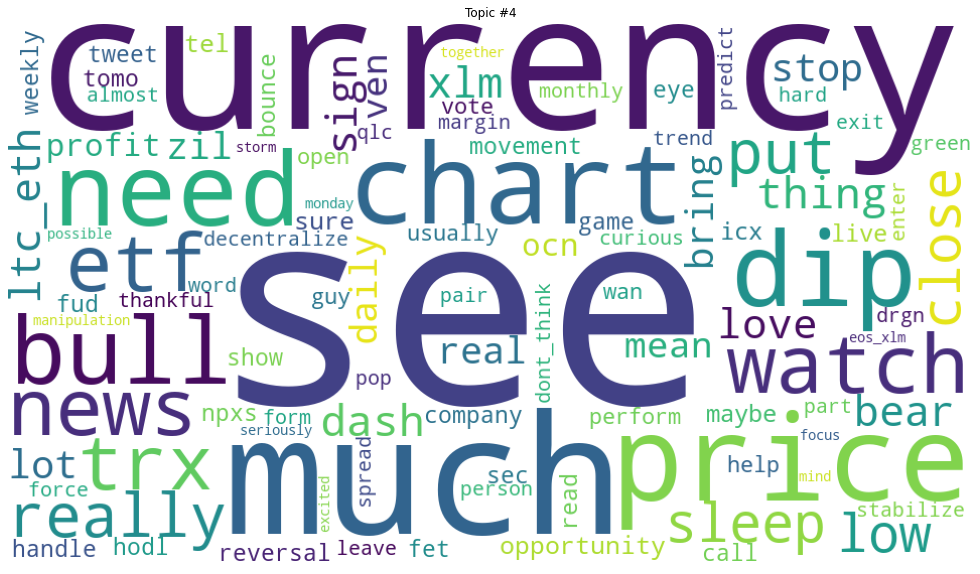

<Figure size 432x288 with 0 Axes>

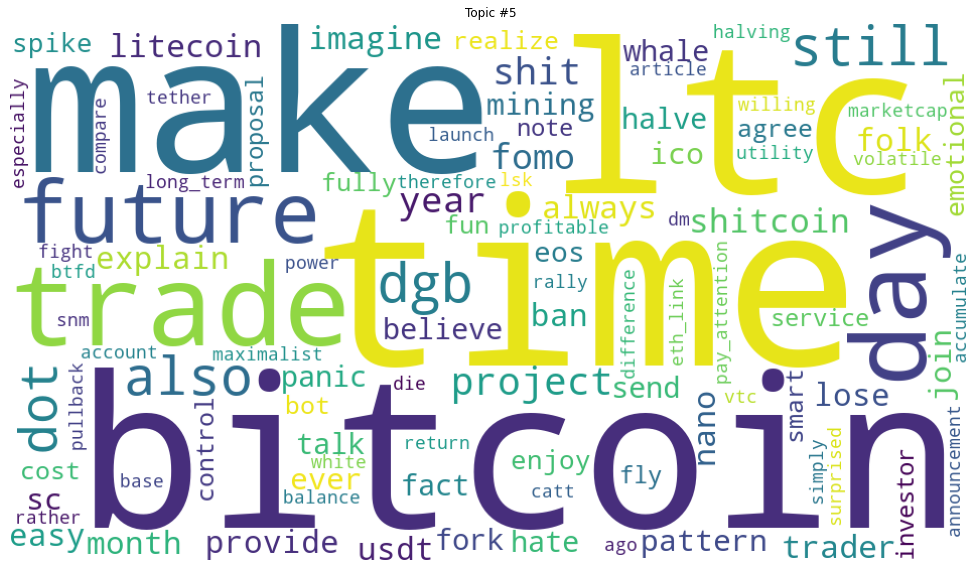

<Figure size 432x288 with 0 Axes>

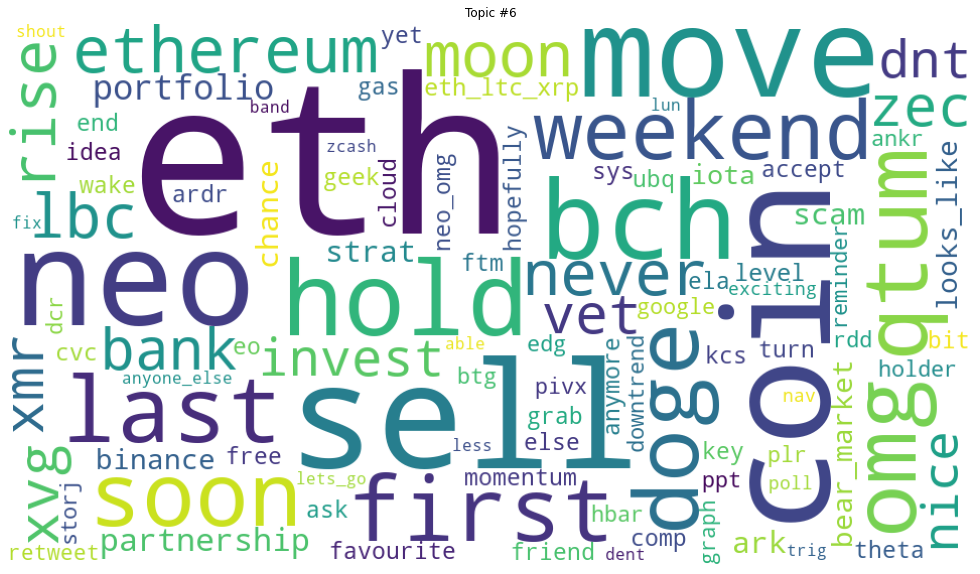

<Figure size 432x288 with 0 Axes>

In [238]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

for t in range(lda_model.num_topics):
    plt.figure(figsize=(20,10))
    plt.imshow(WordCloud(background_color="white", max_words=100, width=960,height=540).fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()
    plt.savefig(f'topic_{t}.png')



### 3.2 t-SNE plot

This shows the topics in 2 dimensions so we can see the similarity between topics. Over your mouse over each point to see some example reviews for that point. 

In [239]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
#arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 7
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)



df_btcsamp['topic'] = topic_num
df_btcsamp['topic']

from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
output_notebook()
top_labels = {0: 'Topic 0', 1:'Topic 1', 2:'Topic 2', 3:'Topic 3', 4: 'Topic 4', 5: 'Topic 5', 6: 'Topic 6'}
cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange'}

df_btcsamp['colors'] = df_btcsamp['topic'].apply(lambda l: cluster_colors[l])
source = ColumnDataSource(dict(
    x=tsne_lda[:,0],
    y=tsne_lda[:,1],
    color=df_btcsamp['colors'],
    label=df_btcsamp['topic'].apply(lambda l: top_labels[l]),
#     msize= p_df['marker_size'],
    topic_key= topic_num,
    #title= p_df[u'Title'],
    content = df_btcsamp['text']
))


title = 'T-SNE visualization of topics'

plot_lda = figure(plot_width=1000, plot_height=600, title=title, tools="pan,wheel_zoom,box_zoom,reset,hover", x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.scatter(x='x', y='y', legend='label', source=source,
                 color='color', alpha=0.8, size=10)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - Topic: @topic_key "}
plot_lda.legend.location = "top_left"

show(plot_lda)

#save the plot
# save(plot_lda, '{}.html'.format(title))


# import seaborn as sb
# output_notebook()
# #plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# plt.figure(figsize=(16, 9))
# sb.scatterplot(
#     tsne_lda[:,0], y=tsne_lda[:,1], hue=topic_num, 
#     legend="full", palette="rainbow"
# )

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8549 samples in 0.022s...
[t-SNE] Computed neighbors for 8549 samples in 1.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8549
[t-SNE] Computed conditional probabilities for sample 2000 / 8549
[t-SNE] Computed conditional probabilities for sample 3000 / 8549
[t-SNE] Computed conditional probabilities for sample 4000 / 8549
[t-SNE] Computed conditional probabilities for sample 5000 / 8549
[t-SNE] Computed conditional probabilities for sample 6000 / 8549
[t-SNE] Computed conditional probabilities for sample 7000 / 8549
[t-SNE] Computed conditional probabilities for sample 8000 / 8549
[t-SNE] Computed conditional probabilities for sample 8549 / 8549
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.055725
[t-SNE] KL divergence after 1000 iterations: 1.590793


Loading BokehJS ...

### 3.3 pyLDAvis plot

This plot again shows the topics plotted in 2 dimensions. The distance between the topics is a measure of their similarity. If the topics are further away, the topics are less similar. Hover your mouse over each topic to see what the most important words are in that topic. You can also use the "Next Topic" button to look at each topic, since some topics are close together and it's difficult to pin point them with the mouse. 

**Important** to note here that the topic numbers do not correspond with the topic numbers in the rest of the report. This is a weakness of pyLDAvis. You can decode the topics as the following:

pyLDAvis Topic = Original topic number (from above) <br>
Topic 1 = Topic 6 <br>
Topic 2 = Topic 2 <br>
Topic 3 = Topic 1 <br>
Topic 4 = Topic 4 <br>
Topic 5 = Topic 3 <br>
Topic 6 = Topic 5 <br>
Topic 7 = Topic 0 <br>



In [243]:
import  pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word, sort_topics=False)
vis

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.058409 -0.035150       1        1  13.018662
1     -0.022700 -0.000411       2        1  11.874020
2     -0.163618 -0.198225       3        1  14.600701
3     -0.243038  0.234125       4        1  15.726068
4      0.132271 -0.179053       5        1  16.493365
5     -0.011196 -0.021219       6        1  13.848251
6      0.249874  0.199933       7        1  14.438932, topic_info=             Term         Freq        Total Category  logprob  loglift
43             go  1029.000000  1029.000000  Default  30.0000  30.0000
67            eth  1086.000000  1086.000000  Default  29.0000  29.0000
50            buy   851.000000   851.000000  Default  28.0000  28.0000
56            alt   758.000000   758.000000  Default  27.0000  27.0000
0             get   582.000000   582.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
159          nice    93.080683    93.953458   Topic7  -4.7903   1.9259
2092    portfolio    91.441073    92.315291   Topic7  -4.8081   1.9257
70          strat    78.263428    79.135561   Topic7  -4.9637   1.9242
87            ark    75.976176    76.850273   Topic7  -4.9934   1.9238
2335  partnership    89.387620    91.717954   Topic7  -4.8308   1.9095

[244 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
104       4  0.995029      ada
1221      4  0.996154  already
25        6  0.992940     also
56        4  0.999187      alt
191       2  0.997607  altcoin
...     ...       ...      ...
1457      1  0.993836      xtz
2651      7  0.988124      xvg
563       6  0.991962     year
1102      7  0.995590      zec
603       5  0.986623      zil

[218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7])

In [245]:
corpus

C:\Users\T430\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(23, 1), (24, 1)],
 [(20, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(35, 1), (36, 1)],
 [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(42, 1), (43, 1), (44, 1), (45, 1), (46, 1)],
 [(0, 1),
  (20, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(55, 1)],
 [(24, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)],
 [(30, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(33, 1), (71, 1), (72, 1)],
 [(43, 1),
  (53, 1),
  (56, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1)],
 [(75, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1